In [119]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep= ";")

Descripción del problema

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

In [120]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [121]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [122]:
for i in df.columns:
    print(df[i].unique())

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
[ 261  149  226 ... 1246 1556 1868]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19

In [123]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [124]:
for i in df.columns:
    print(df[i].value_counts())

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: count, 

In [125]:
!pip install tableone
from tableone  import TableOne, load_dataset

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [126]:
def is_binary(df_, nums):
    df = df_.copy()
    variables = []
    for var in nums:
        flag = True
        unique = df_[var].unique()
        for value in unique:
            if value not in [0, 1, np.nan, 0.0, 1.0]:
                flag = False
        if flag == True:
            variables.append(var)
    return variables

def breakdown_vars(df, off_binary=False):
    """
    This function allow us categorize accodign to numerical or not
    """
    binaries = is_binary(df, df.columns)
    categorial = []
    nonormal = []
    normal = []
    for t in df.columns:
        if off_binary == False:
          if (df[t].dtypes.name=="object" or df[t].dtypes.name=='category') and  t not in binaries:
            categorial.append(t)
        else:
           if (df[t].dtypes.name=="object" or df[t].dtypes.name=='category'):
            categorial.append(t)
        if (df[t].dtypes=="int64" or df[t].dtypes=="float64") and t not in binaries:
                n,p = stats.shapiro(df[t])
                if p<0.05:
                    nonormal.append(t)
                else:
                    normal.append(t)
    if off_binary == False:
      return categorial, binaries, nonormal, normal
    else:
      return categorial, nonormal, normal

In [127]:
cat, nonormal ,  normal = breakdown_vars(df,  off_binary=True)

/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41188.
  res = hypotest_fun_out(*samples, **kwds)


In [128]:
mytable = TableOne(df,categorical=cat, nonnormal=nonormal, groupby='y', pval=True)

In [129]:
mytable

Grouped by y                                                                                
                                                        Missing                 Overall                      no                     yes P-Value
n                                                                                 41188                   36548                    4640        
age, median [Q1,Q3]                                           0        38.0 [32.0,47.0]        38.0 [32.0,47.0]        37.0 [31.0,50.0]   0.016
job, n (%)                     admin.                                      10422 (25.3)             9070 (24.8)             1352 (29.1)  <0.001
                               blue-collar                                  9254 (22.5)             8616 (23.6)              638 (13.8)        
                               entrepreneur                                  1456 (3.5)              1332 (3.6)               124 (2.7)        
                               housemaid                                     1060 (2.6)               954 (2.6)               106 (2.3)        
                               management                                    2924 (7.1)              2596 (7.1)               328 (7.1)        
                               retired                                       1720 (4.2)              1286 (3.5)               434 (9.4)        
                               self-employed                                 1421 (3.5)              1272 (3.5)               149 (3.2)        
                               services                                      3969 (9.6)             3646 (10.0)               323 (7.0)        
                               student                                        875 (2.1)               600 (1.6)               275 (5.9)        
                               technician                                   6743 (16.4)             6013 (16.5)              730 (15.7)        
                               unemployed                                    1014 (2.5)               870 (2.4)               144 (3.1)        
                               unknown                                        330 (0.8)               293 (0.8)                37 (0.8)        
marital, n (%)                 divorced                                     4612 (11.2)             4136 (11.3)              476 (10.3)  <0.001
                               married                                     24928 (60.5)            22396 (61.3)             2532 (54.6)        
                               single                                      11568 (28.1)             9948 (27.2)             1620 (34.9)        
                               unknown                                         80 (0.2)                68 (0.2)                12 (0.3)        
education, n (%)               basic.4y                                     4176 (10.1)             3748 (10.3)               428 (9.2)  <0.001
                               basic.6y                                      2292 (5.6)              2104 (5.8)               188 (4.1)        
                               basic.9y                                     6045 (14.7)             5572 (15.2)              473 (10.2)        
                               high.school                                  9515 (23.1)             8484 (23.2)             1031 (22.2)        
                               illiterate                                      18 (0.0)                14 (0.0)                 4 (0.1)        
                               professional.course                          5243 (12.7)             4648 (12.7)              595 (12.8)        
                               university.degree                           12168 (29.5)            10498 (28.7)             1670 (36.0)        
                               unknown                                       1731 (4.2)              1480 (4.0)               251 (5.4)        
default, n (%)     

Pese que a este punto podemos observar que la variable age, por su P-Val, no aporta información a si el cliente contrata un depósito a largo plazo o no opte por dejarlo a la primera prueba de la Regresion y ver que tanto cambia el resultado sin esta variable.

In [130]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe_df = pd.DataFrame(ohe.fit_transform(df[categorical]).toarray())
df.drop(columns=categorical, inplace=True)
ohe_df.columns = ohe.get_feature_names_out(categorical)
df=df.join(ohe_df)

In [131]:
df.drop(columns='emp.var.rate', inplace=True)

In [132]:
df

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57,149,1,999,0,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,226,1,999,0,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,151,1,999,0,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,307,1,999,0,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,94.767,-50.8,1.028,4963.6,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41184,46,383,1,999,0,94.767,-50.8,1.028,4963.6,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41185,56,189,2,999,0,94.767,-50.8,1.028,4963.6,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41186,44,442,1,999,0,94.767,-50.8,1.028,4963.6,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


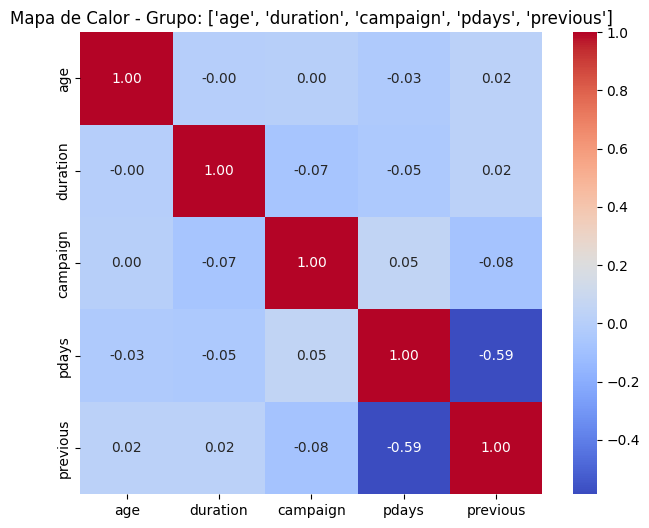

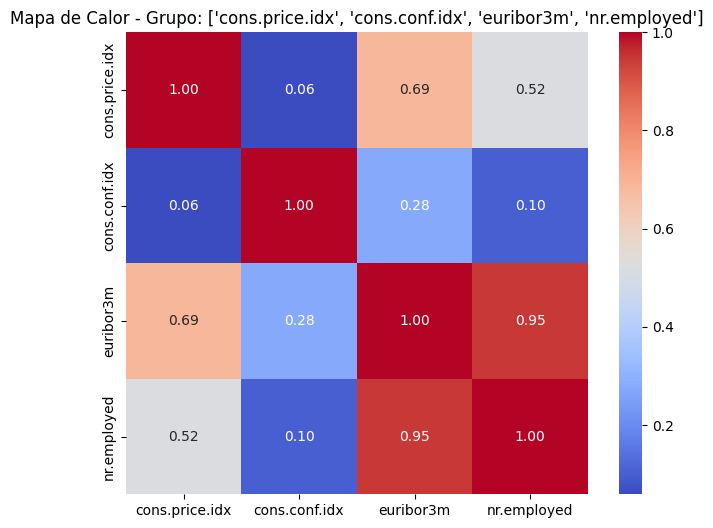

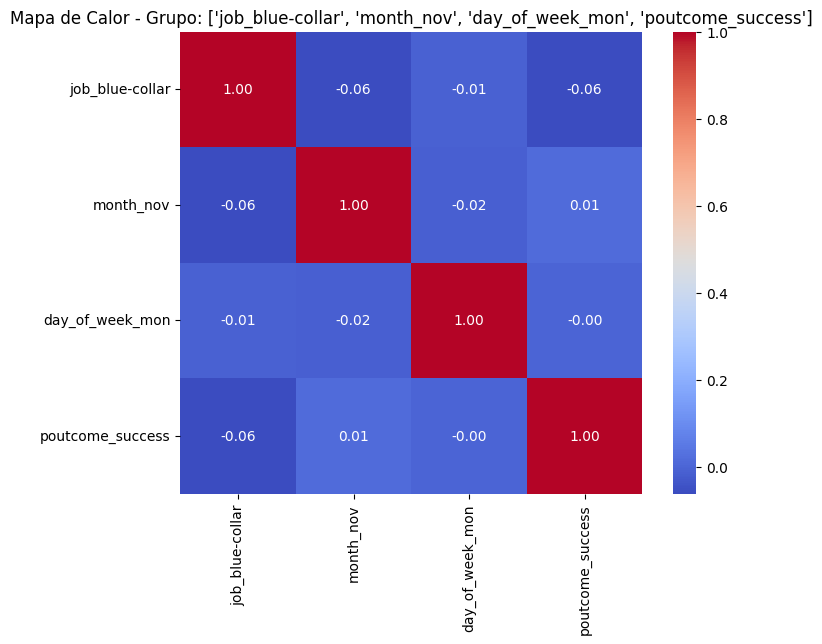

In [135]:
grupo1 = ['age', 'duration', 'campaign', 'pdays', 'previous']
grupo2 = ['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
grupo3 = ['job_blue-collar', 'month_nov', 'day_of_week_mon', 'poutcome_success']

# Crear mapas de calor por grupos
for group in [grupo1, grupo2, grupo3]:
    correlation_matrix = df[group].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Mapa de Calor - Grupo: {group}')
    plt.show()

In [138]:
X_train = df.drop(["y_yes"], axis = 1)
y_train = df["y_yes"]
X_test = df.drop(["y_yes"], axis = 1)
y_test = df["y_yes"]

In [142]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1234)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [143]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [145]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8507817811012917